# Исследование влияния факторов, связанных с уровнем санитарии и финансированием медицины на продолжительность жизни

In [2]:
import sys
# Добавим папку проекта в список системных директорий, чтобы Python видел путь к папке utils
sys.path.append('..')

In [3]:
import pandas as pd
import plotly.express as px

from utils.constants import (
    F, 
    FieldSemanticCategory,
)
from utils.graphics import (
    display_corellation_by_target,
    display_clusters_profiles,
)
from utils.display_content import (
    dislay_some_fields_description,
    display_fields_correlation,
)
from utils.prepare_data import (
    get_fields_by_semantic_category,
    get_scaled_data,
)

from warnings import simplefilter
simplefilter('ignore')

In [4]:
# Загрузим таблицу
data_source = pd.read_csv('../data/cumulative_life_expectancy_prepared.csv')

data_source.head()

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,AdultMortality,Homicides,MaternalMortality,AdultNcdMortality,AdultNcdMortality117,...,Sanitation,DrinkingWater,HealthCareCosts,HealthCareCostsGdp,HealthCareCostsPerCapita,GdpPerCapita,Population,Schooling,ClusterKMeans,LifeExpectancy
0,AFR,Africa,AGO,Angola,2000,34.56,0.01331,0.859921,30.5,0.028126,...,27.56,41.14,2.74,1.11,7.66,563.733796,16194869.0,5.027188,1,49.37
1,AFR,Africa,AGO,Angola,2001,33.86,0.01310,0.799641,29.7,0.027503,...,28.99,42.25,5.97,2.05,13.35,533.586202,16747208.0,5.092250,1,50.06
2,AFR,Africa,AGO,Angola,2002,32.51,0.01288,0.758272,29.4,0.027049,...,30.42,43.38,4.19,1.31,11.54,882.147847,17327699.0,5.157312,1,51.06
3,AFR,Africa,AGO,Angola,2003,32.16,0.01265,0.676496,29.3,0.026962,...,31.86,44.36,4.26,1.47,14.55,992.698979,17943712.0,5.222375,1,51.74
4,AFR,Africa,AGO,Angola,2004,32.24,0.01229,0.594192,29.0,0.026300,...,33.29,45.35,5.66,1.69,21.36,1266.210864,18600423.0,5.287437,1,52.36


Оставим в таблице только те поля, которые будем рассматривать.

In [ ]:
# Поля с данными о санитарии и медицине
medicine_fields = get_fields_by_semantic_category(
    FieldSemanticCategory.MEDICINE.value,
)
# Поля с данными о кодах и названиях стран и регионов
country_naming_fields = get_fields_by_semantic_category(
    FieldSemanticCategory.COUNTRY_NAMING.value,
)

# Оставим в таблице только рассматриваемые поля
necessary_fields = country_naming_fields + [F.Period.value] + \
    medicine_fields + [F.ClusterKMeans.value, F.LifeExpectancy.value]
    
data = data_source[necessary_fields]

data.head()

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,Sanitation,DrinkingWater,HealthCareCosts,HealthCareCostsGdp,HealthCareCostsPerCapita,ClusterKMeans,LifeExpectancy
0,AFR,Africa,AGO,Angola,2000,27.56,41.14,2.74,1.11,7.66,1,49.37
1,AFR,Africa,AGO,Angola,2001,28.99,42.25,5.97,2.05,13.35,1,50.06
2,AFR,Africa,AGO,Angola,2002,30.42,43.38,4.19,1.31,11.54,1,51.06
3,AFR,Africa,AGO,Angola,2003,31.86,44.36,4.26,1.47,14.55,1,51.74
4,AFR,Africa,AGO,Angola,2004,33.29,45.35,5.66,1.69,21.36,1,52.36


In [6]:
# Выведем описание полей
dislay_some_fields_description(necessary_fields)

**Описание полей:**

- `ParentLocationCode` - Код региона

- `ParentLocation` - Название региона

- `SpatialDimValueCode` - Код страны

- `Location` - Название страны

- `Period` - Год

- `Sanitation` - Население, пользующееся как минимум базовыми услугами санитарии (%)

- `DrinkingWater` - Население, пользующееся по крайней мере базовыми услугами питьевого водоснабжения (%)

- `HealthCareCosts` - Общие внутренние государственные расходы на здравоохранение в процентах от общих государственных расходов (%)

- `HealthCareCostsGdp` - Общие внутренние государственные расходы на здравоохранение в процентах от валового внутреннего продукта (ВВП) (%)

- `HealthCareCostsPerCapita` - Общие внутренние государственные расходы на здравоохранение на душу населения в долларах США

- `ClusterKMeans` - Кластер страны, определенный с помощью k-means

- `LifeExpectancy` - Ожидаемая продоложительность жизни

## Корреляция признаков

Построим тепловую карту корреляции рассматриваемых признаков и посмотрим на их взаимное влияние.

Построим матрицу корреляции.

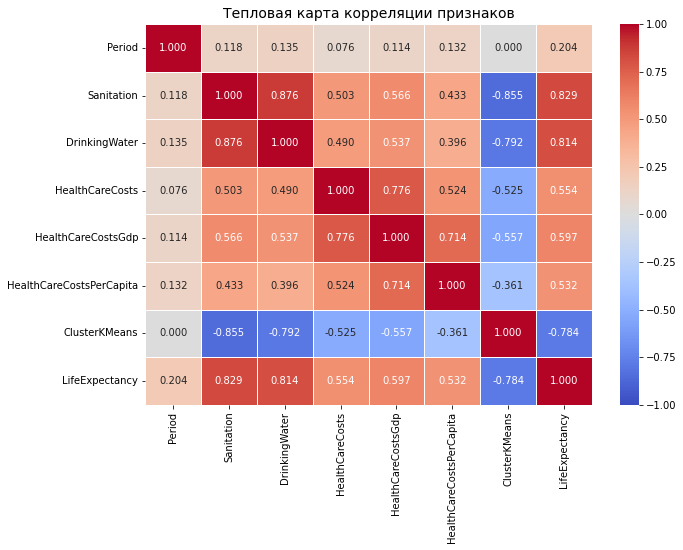

Посмотрим на пары признаков с коэффициентом корреляции больше, чем `0.7`

[(['Sanitation', 'DrinkingWater'], 0.88),
 (['Sanitation', 'ClusterKMeans'], -0.85),
 (['Sanitation', 'LifeExpectancy'], 0.83),
 (['DrinkingWater', 'ClusterKMeans'], -0.79),
 (['DrinkingWater', 'LifeExpectancy'], 0.81),
 (['HealthCareCosts', 'HealthCareCostsGdp'], 0.78),
 (['HealthCareCostsGdp', 'HealthCareCostsPerCapita'], 0.71),
 (['ClusterKMeans', 'LifeExpectancy'], -0.78)]

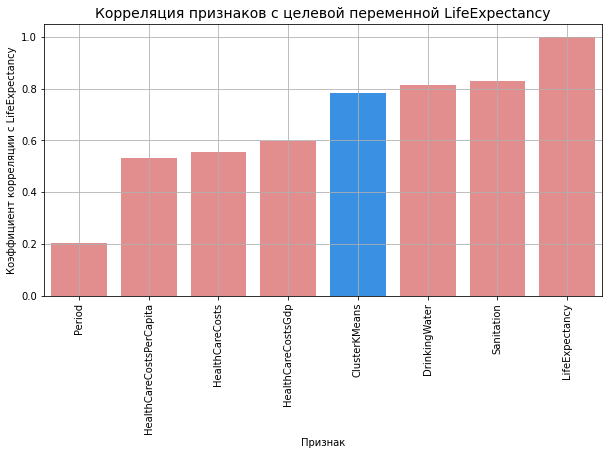

In [7]:
display_fields_correlation(
    data,
    matrix_figsize=(10, 7),
    barplot_figsize=(10, 5),
)

Видим, что наибольшая корреляция есть между признаками `Sanitation` (уровень санитарии) и `DrinkingWater` (наличие питьевой воды). \
Это логично, потому что для поддержания уровня санитарии на должном уровне нужна чистая вода.

Признаки, отражающие финансирование медицины (`HealthCareCosts`, `HealthCareCostsGdp`, `HealthCareCostsPerCapita`) также коррелируют между собой. \
Это закономерно, потому что они с разных сторон отражают суть одного явления - финансирования медицины.

Из этих трех признаков наиболее коррелирует с целевым `HealthCareCostsGdp` (общие внутренние государственные расходы на здравоохранение в процентах от ВВП).

## Влияние санитарной обстановки на продолжительность жизни в разных странах

Посмотрим, как обстоит ситуация с уровнем санитарии в разных странах.

In [8]:
fig = px.choropleth(
    data, 
    locations=F.SpatialDimValueCode.value, 
    color=F.Sanitation.value,
    hover_name=F.Location.value,
    projection='natural earth',
    animation_frame=F.Period.value,
    width=1000,
    height=700,
    title='Процент населения, пользующегося как минимум базовыми услугами санитарии в разных странах с 2000 по 2020 годы',
)

fig.show()

Анимация по годам показывает, что карта с годами "желтеет", то есть ситуация улучшается.\
Также визуально прослеживается аналогия с картой продолжительности жизни, построенной здесь [02_target.ipynb](./02_target.ipynb)\
В странах, в которых продолжительность жизни меньше, уровень санитарии ниже и наоборот.

Отобразим эту закономерность на графике.

In [9]:
# Сгруппиуем данные по году
sanitation_live_mean_data = data.groupby(F.Period.value).agg(
    # Возьмем среднее про уровню санитарии и продолжительности жизни
    SanitationMean=(F.Sanitation.value, 'mean'),
    LifeExpectancyMean=(F.LifeExpectancy.value, 'mean'),
).reset_index()

sanitation_live_mean_data.head()

,Period,SanitationMean,LifeExpectancyMean
0,2000,65.356600,67.022541
1,2001,65.716176,67.353481
2,2002,66.156059,67.581823
3,2003,66.703076,67.815138
4,2004,67.261527,68.151215


In [10]:
# Отобразим данные на графике

fig = px.scatter(
    sanitation_live_mean_data,
    x='SanitationMean', 
    y='LifeExpectancyMean',
    hover_name=F.Period.value,
    color=F.Period.value,    
)

fig.update_layout(
    title='Зависимость продолжительности жизни от возможности пользоваться базовыми услугами санитарии',
    xaxis_title='Средний % населения, пользующегося базовыми услугами санитарии',
    yaxis_title='Средняя ожидаемая продолжительность жизни',
)

fig.show()

Видно, что оба признака растут и имеют положительную корреляцию.\
Исключением является последняя точка за 2020 г., в которой рост уровня санитарии есть, но роста продолжительности жизни нет.\
Связано это скорее всего с COVID-19.

Посмотрим на страны с наиболее и наименее благоприятными условиями в плане санитарии.

In [11]:
sanitation_data = data.groupby(by=[F.Location.value]).agg(
    SanitationMean=(F.Sanitation.value, 'mean')
).sort_values('SanitationMean')

print('Страны с наименее благоприятной санитарной обстановкой')
sanitation_data.head()

Страны с наименее благоприятной санитарной обстановкой


,SanitationMean
Location,
Ethiopia,5.875714
Madagascar,8.636190
Niger,10.427619
Chad,10.811429
Sierra Leone,13.316190


В Эфиопии только 5% населения имеют возможность пользоваться базовыми услугами санитарии.

In [12]:
print('Страны с наиболее благоприятной санитарной обстановкой')
sanitation_data.tail()

Страны с наиболее благоприятной санитарной обстановкой


,SanitationMean
Location,
Austria,99.985238
Australia,99.995714
Singapore,100.000000
Kuwait,100.000000
New Zealand,100.000000


Посмотрим, как обстоят дела в Японии, где продолжительность жизни наибольшая.

In [13]:
sanitation_data.loc['Japan']

SanitationMean    99.972857
Name: Japan, dtype: float64

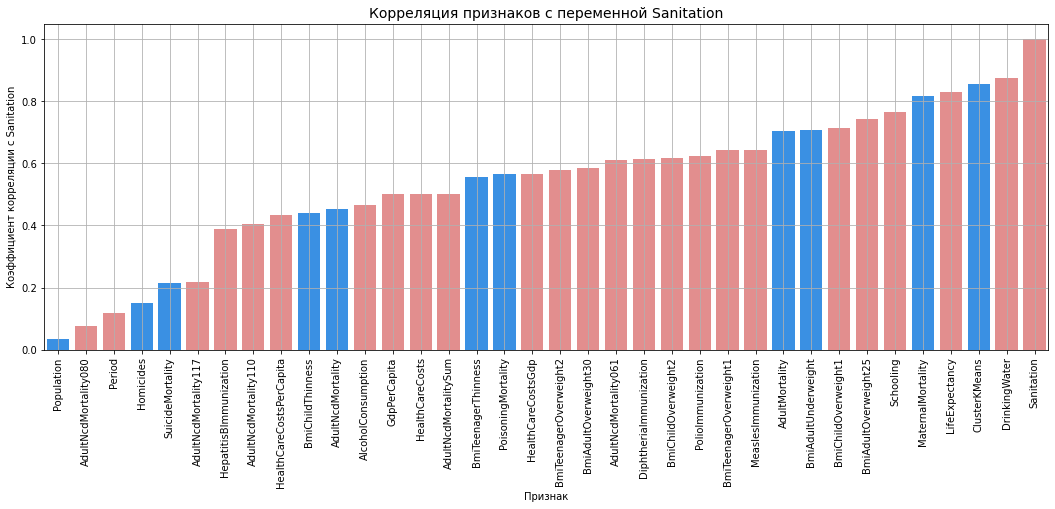

In [14]:
# Посмотрим, как коррелируют с уровнем санитарии другие признаки
display_corellation_by_target(
    data_source,
    figsize=(18, 6),
    target_feature_name=F.Sanitation.value,
)

Из признаков, которые имеют сильную корреляцию \
(кроме признаков, связанных с ВВП и общей продолжительностью жизни, которые рассмотрим тут отдельно), \
можно выделить: 

In [15]:
dislay_some_fields_description([
    F.MaternalMortality.value, 
    F.AdultNcdMortality.value,
    F.PoisoningMortality.value,
])

**Описание полей:**

- `MaternalMortality` - Коэффициент материнской смертности (%)

- `AdultNcdMortality` - Вероятность (в %) смерти в возрасте от 30 до 70 лет от сердечно-сосудистых заболеваний, рака, диабета или хронических респираторных заболеваний

- `PoisoningMortality` - Уровень смертности от непреднамеренного отравления (%)

Потому что они, пожалуй, являются явным следствием неблагоприятной санитарной обстановки.\
Остальные признаки коррелируют скорее всего по опосредованным причинам.

## Влияние финансирования здравоохранения на продолжительность жизни в разных странах

In [16]:
fig = px.choropleth(
    data, 
    locations=F.SpatialDimValueCode.value, 
    color=F.HealthCareCostsGdp.value,
    hover_name=F.Location.value,
    projection='natural earth',
    animation_frame=F.Period.value,
    width=1000,
    height=700,
    title='Общие внутренние государственные расходы на здравоохранение в процентах от ВВП',
)

fig.show()

Посмотрим на страны с наибольшим и наименьшим финансированием здравоохранения (в процентах от ВВП).

In [17]:
# Сгруппируем данные по странам
health_gdp_data = data.groupby(by=[F.Location.value]).agg(
    # И возмем среднее по проценту расходов на здравоохранение за все года
    SanitationMean=(F.HealthCareCostsGdp.value, 'mean')
).sort_values('SanitationMean')

print('Страны с наименьшим финансированием здравоохранения (в % от ВВП)')
health_gdp_data.head()

Страны с наименьшим финансированием здравоохранения (в % от ВВП)


,SanitationMean
Location,
Democratic Republic of the Congo,0.351524
Equatorial Guinea,0.424286
Bangladesh,0.458095
Guinea,0.463810
Myanmar,0.470476


In [18]:
print('Страны с наибольшим финансированием здравоохранения (в % от ВВП)')
health_gdp_data.tail()

Страны с наибольшим финансированием здравоохранения (в % от ВВП)


,SanitationMean
Location,
Sweden,7.891429
Denmark,8.187619
Germany,8.286667
Kiribati,8.829048
Cuba,8.842857


Наименьшее финансирование в Демократической Республике Конго, наибольшее на Кубе.

Посмотрим на зависимость продолжительности жизни от финансирования здравоохранения.

In [19]:
# Сгруппируем данные по году
health_costs_and_live_data = data.groupby(F.Period.value).agg(
    # Возмем среднее для всех стран расходы на здравоохранение и продолжительность жизни
    HealthCareCostsGdpMean=(F.HealthCareCostsGdp.value, 'mean'),
    LifeExpectancyMean=(F.LifeExpectancy.value, 'mean'),
).reset_index()

health_costs_and_live_data.head()

,Period,HealthCareCostsGdpMean,LifeExpectancyMean
0,2000,2.682667,67.022541
1,2001,2.788949,67.353481
2,2002,2.847979,67.581823
3,2003,2.897914,67.815138
4,2004,2.889556,68.151215


In [ ]:
# Отобразим данные на графике
fig = px.scatter(
    health_costs_and_live_data,
    x='HealthCareCostsGdpMean', 
    y='LifeExpectancyMean',
    hover_name=F.Period.value,
    color=F.Period.value,    
)

fig.update_layout(
    title='Зависимость продолжительности жизни от финансирования здравоохранения',
    xaxis_title='Общие внутренние государственные расходы на здравоохранение в % от ВВП',
    yaxis_title='Средняя ожидаемая продолжительность жизни',
)

fig.show()

Видно, что есть тенденция к росту продолжительности жизни при увеличении финансирования здравоохранения.\
Отдельно расположена точка за 2020 г.\
Финансирование выросло значительно, а продолжительность жизни стала немного меньше.\
Опять же скорее всего это связано с COVID-19.

Также видно, что с течением лет растет средний процент (от ВВП) расходов на здравоохранение.

## Зависимость доли расходов на здравоохранение от общего размера ВВП

Есть предположение, что процент, выделяемый на финансирование здравоохранения, зависит от ВВП в целом.\
При низком ВВП на финансирование здравоохранения выделяется более низкий процент, чем при высоком.\
Проверим это.

In [21]:
# Создадим таблицу с необходимыми признаками
gdp_fields = country_naming_fields + \
    [F.Period.value, F.GdpPerCapita.value, F.HealthCareCostsGdp.value, F.LifeExpectancy.value]
gdp_data = data_source[gdp_fields]
gdp_data.head()

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,GdpPerCapita,HealthCareCostsGdp,LifeExpectancy
0,AFR,Africa,AGO,Angola,2000,563.733796,1.11,49.37
1,AFR,Africa,AGO,Angola,2001,533.586202,2.05,50.06
2,AFR,Africa,AGO,Angola,2002,882.147847,1.31,51.06
3,AFR,Africa,AGO,Angola,2003,992.698979,1.47,51.74
4,AFR,Africa,AGO,Angola,2004,1266.210864,1.69,52.36


In [22]:
# Сгруппируем данные по странам и возьмем среднее по всем годам
gdp_mean_data = gdp_data \
    .groupby(by=[F.Location.value]) \
    .agg(
        # Средний ВВП на душу населения
        GdpPerCapitaMean=(F.GdpPerCapita.value, 'mean'),
        # Средний процент расходов на здравоохранение
        HealthCareCostsGdpMean=(F.HealthCareCostsGdp.value, 'mean'),
        # Средняя продолжительность жизни
        LifeExpectancyMean=(F.LifeExpectancy.value, 'mean'),
    )\
    .reset_index()\
    .sort_values(by=['GdpPerCapitaMean', 'HealthCareCostsGdpMean'])
    
gdp_mean_data.head()

,Location,GdpPerCapitaMean,HealthCareCostsGdpMean,LifeExpectancyMean
26,Burundi,192.862050,2.122857,57.178571
44,Democratic Republic of the Congo,344.345984,0.351524,57.380476
31,Central African Republic,386.229949,0.982381,48.598571
149,Somalia,393.626477,1.331191,51.107143
55,Ethiopia,408.354631,1.167619,61.917143


In [ ]:
# Отобразим полученные данные на графике
fig = px.scatter(
    gdp_mean_data,
    x='GdpPerCapitaMean', 
    y='HealthCareCostsGdpMean',
    hover_name='Location',
    color='LifeExpectancyMean',
)

fig.update_layout(
    title='Зависимость доли расходов на здравоохранение от общего ВВП страны за 2000-2020 гг.',
    xaxis_title='ВВП страны на душу населения',
    yaxis_title='Процент расходов на здравоохранение от ВВП',
)

fig.show()

В целом по графику видно, что есть закономерность в том, что чем больше ВВП на душу населения у страны,\
тем больший процент идет на здравоохранение и тем больше продолжительность жизни.

Но есть и исключения, например, страна [Кирибати](https://ru.wikipedia.org/wiki/%D0%9A%D0%B8%D1%80%D0%B8%D0%B1%D0%B0%D1%82%D0%B8), \
у которой низкий ВВП, но при этом процент расходов на здравоохранение один из самых высоких.\
Ниже исследуем ее подробнее.

In [24]:
# Выделим из таблицы только данные для страны Кибарити и оставим нужные поля
kiribati_data = gdp_data[gdp_data[F.Location.value] == 'Kiribati'] \
    [[F.Period.value, F.GdpPerCapita.value, F.HealthCareCostsGdp.value, F.LifeExpectancy.value]]
    
kiribati_data

,Period,GdpPerCapita,HealthCareCostsGdp,LifeExpectancy
3507,2000,845.367556,7.52,60.08
3508,2001,718.833757,11.50,60.39
3509,2002,810.108950,10.99,60.60
3510,2003,1020.500502,9.63,60.80
3511,2004,1083.268590,11.81,60.91
3512,2005,1161.783727,10.95,61.02
3513,2006,1123.192683,9.42,61.10
3514,2007,1352.578300,8.82,61.19
3515,2008,1410.622495,10.08,61.27
3516,2009,1316.627346,8.12,61.32


In [25]:
# Посмотрим на характеристики распределения признаков
kiribati_data.drop(columns=[F.Period.value]).describe()

,GdpPerCapita,HealthCareCostsGdp,LifeExpectancy
count,21.000000,21.000000,21.000000
mean,1436.057114,8.829048,61.245714
std,386.217827,1.583442,0.523685
min,718.833757,6.090000,60.080000
25%,1123.192683,7.530000,60.910000
50%,1522.101102,8.790000,61.320000
75%,1769.432118,9.630000,61.630000
max,1912.737981,11.810000,62.140000


По данным видно, что это стабильная ситуация для страны за рассматриваемый период.\
Страна имеет в среднем доход 1 436 $ на человека в год и тратит на здравоохранение в среднем 9% своего дохода.\
При этом продолжительность жизни удерживается в пределах 60-62 года.\
Возможно, это связано с географическими особенностями страны (она расположена на островах).

## Влияние финансирования здравоохранения на уровень санитарии в разных странах

Посмотрим, как зависит уровень санитарии от финансирования здравоохранения.

In [26]:
# Сгруппируем данные по странам
sanitation_costs_mean_data = data.groupby(by=[F.Location.value]).agg(
    # И возьмем среднее по уровню санитарии, финансированию здравоохранения и продолжительности жизни
    # по всем годам
    SanitationMean=(F.Sanitation.value, 'mean'),
    HealthCareCostsGdpMean=(F.HealthCareCostsGdp.value, 'mean'),
    LifeExpectancyMean=(F.LifeExpectancy.value, 'mean')
).reset_index()

sanitation_costs_mean_data.head()

,Location,SanitationMean,HealthCareCostsGdpMean,LifeExpectancyMean
0,Afghanistan,35.768571,0.686331,58.382857
1,Albania,94.914762,2.661905,76.239048
2,Algeria,86.187143,3.193333,74.863810
3,Angola,40.781429,1.543333,57.203810
4,Antigua and Barbuda,89.454328,2.903333,75.480476


In [ ]:
# Отобразим данные на графике
fig = px.scatter(
    sanitation_costs_mean_data,
    x='HealthCareCostsGdpMean', 
    y='SanitationMean',
    hover_name='Location',
    color='LifeExpectancyMean',    
    height=600,    
)

fig.update_layout(
    title='Зависимость уровня санитарии от доли расходов на здравоохранение в странах за 2000-2020 г',
    xaxis_title='Процент расходов на здравоохранение от ВВП',
    yaxis_title='Процент населения, пользующееся базовыми услугами санитарии',
)

fig.show()

В целом можно наблюдать зависимость, что чем больше составляет процент расходов на здравоохранение,
тем больший прцент населения имеет возможность пользоваться базовыми услугами санитарии
и тем больше продолжительность жизни.

Как и на предыдущем графике отдельно расположена точка страны [Кирибати](https://ru.wikipedia.org/wiki/%D0%9A%D0%B8%D1%80%D0%B8%D0%B1%D0%B0%D1%82%D0%B8). \
Несмотря на высокий процент расходов, всего 40% населения могут пользоваться услугами базовой санитарии.

## Сравнение средних показателей в кластерах стран

Ранее мы разделили страны на 2 кластера.\
В кластер 0 попали страны с более благоприятными условиями для жизни, а в кластер 1 с менее благоприятными.\
Сравним средние значения рассматриваемых признаков в двух кластерах.

In [29]:
# Масштабируем данные
scaled_data = get_scaled_data(data)

# Возьмем средние значения по кластерам и построим полярную диаграмму
display_clusters_profiles(
    scaled_data.groupby(F.ClusterKMeans.value).agg('mean'),
)

,Sanitation,DrinkingWater,HealthCareCosts,HealthCareCostsGdp,HealthCareCostsPerCapita,LifeExpectancy
ClusterKMeans,,,,,,
0,0.897557,0.938108,0.328179,0.335217,0.112226,0.787548
1,0.342685,0.560406,0.171473,0.120257,0.003786,0.468040


По графику можно сделать вывод, что в целом профиль распределения средних значений признаков в кластерах похож.\
Но в кластере 0 (страны с более благоприятными условиями жизни) все рассматриваемые показатели имеют более высокие значения.\
Что конечно же отражается на уровне жизни.

## Выводы

- Из рассмотренных признаков на продолжительность жизни наиболее сильно влияет процент населения, у которого есть возможность пользоваться базовыми услугами санитарии (признак `Sanitation`).\
Чем больше этот процент, тем больше продолжительность жизни.

- В среднем по странам процент населения, имеющего доступ к базовым услугам санитарии, увеличивается с течением лет.

- Есть положительная корреляция между расходами на здравоохранение и продолжительностью жизни.

- Процент расходов (от ВВП) на здравоохранение увеличивается с годами.

- Прослеживается закономерность, что чем выше ВВП страны, тем больше она тратит на здравоохранение.\
И тем больше продолжительность жизни в стране. Но есть исключения.

- Чем больше процент расходов на здравоохранение, тем лучше санитарная обстановка в стране.\
Но опять же, есть исключения.

- В странах с более благоприятными условиями жизни (кластер 0) значения всех рассматриваемых показателей больше, чем в странах из кластера 0 (страны с менее благоприятными условиями).